# JSONL Annotations Exploration


In [1]:
import os
import jsonlines
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
path = os.path.join('datasets', 'jsonl')
train_path = os.path.join(path, 'train.jsonl')
val_path = os.path.join(path, 'val.jsonl')
test_path = os.path.join(path, 'test.jsonl')
datasets_paths = {'train':train_path, 'validation':val_path, 'test':test_path}

```json
{
    "text":" * ABARO, Bourg ou petite Ville de Syrie dans l'Antiliban. ",
    "meta":{
        "volume":1,
        "numero":95,
        "head":"ABARO",
        "paragraph":1,
        "domain_article":"Géographie",
        "domain_paragraph":"Géographie",
        "author":"Diderot"
        },
    "_input_hash":1401495229,
    "_task_hash":1065605843,
    "tokens":[
        {"text":" ","start":0,"end":1,"id":0,"ws":false},
        {"text":"*","start":1,"end":2,"id":1,"ws":true},
        {"text":"ABARO","start":3,"end":8,"id":2,"ws":false},
        {"text":",","start":8,"end":9,"id":3,"ws":true},
        {"text":"Bourg","start":10,"end":15,"id":4,"ws":true},
        {"text":"ou","start":16,"end":18,"id":5,"ws":true},
        {"text":"petite","start":19,"end":25,"id":6,"ws":true},
        {"text":"Ville","start":26,"end":31,"id":7,"ws":true},
        {"text":"de","start":32,"end":34,"id":8,"ws":true},
        {"text":"Syrie","start":35,"end":40,"id":9,"ws":true},
        {"text":"dans","start":41,"end":45,"id":10,"ws":true},
        {"text":"l'","start":46,"end":48,"id":11,"ws":false},
        {"text":"Antiliban","start":48,"end":57,"id":12,"ws":false},
        {"text":".","start":57,"end":58,"id":13,"ws":true}
        ],
    "_view_id":"spans_manual",
    "spans":[
        {"start":3,"end":8,"token_start":2,"token_end":2,"label":"Head"},
        {"start":10,"end":15,"token_start":4,"token_end":4,"label":"NC-Spatial"},
        {"start":10,"end":57,"token_start":4,"token_end":12,"label":"ENE-Spatial"},
        {"start":19,"end":31,"token_start":6,"token_end":7,"label":"NC-Spatial"},
        {"start":35,"end":40,"token_start":9,"token_end":9,"label":"NP-Spatial"},
        {"start":41,"end":45,"token_start":10,"token_end":10,"label":"Relation"},
        {"start":46,"end":57,"token_start":11,"token_end":12,"label":"NP-Spatial"}
        ],
    "answer":"accept",
    "_timestamp":1698431294,
    "_annotator_id":"2023-10-27_19-46-51",
    "_session_id":"2023-10-27_19-46-51",
    "domain_paragraph":"Géographie"
}
```


## Load datasets

In [3]:
dfs = []
for key, dataset_path in datasets_paths.items():

    df_tmp=pd.read_json(dataset_path, lines=True)
    df_tmp['dataset'] = key
    dfs.append(df_tmp)

df = pd.concat(dfs, ignore_index=True)
df['domain_paragraph'] = df.apply(lambda x: x['meta']['domain_paragraph'], axis=1)
df['volume'] = df.apply(lambda x: x['meta']['volume'], axis=1)
df['author'] = df.apply(lambda x: x['meta']['author'], axis=1)
df['entrie'] = df.apply(lambda x: str(x['meta']['volume'])+'_'+str(x['meta']['article']), axis=1)

In [4]:
df.head()

,text,meta,tokens,spans,dataset,domain_paragraph,volume,author,entrie
0,"ILLESCAS, (Géog.) petite ville d'Espagne, dans...","{'volume': 8, 'head': 'ILLESCAS', 'author': 'u...","[{'text': 'ILLESCAS', 'start': 0, 'end': 8, 'i...","[{'text': 'ILLESCAS', 'start': 0, 'end': 8, 't...",train,Géographie,8,unsigned,8_2637
1,"MULHAUSEN, (Géog.) ville impériale d'Allemagne...","{'volume': 10, 'head': 'MULHAUSEN', 'author': ...","[{'text': 'MULHAUSEN', 'start': 0, 'end': 9, '...","[{'text': 'MULHAUSEN', 'start': 0, 'end': 9, '...",train,Géographie,10,Jaucourt,10_3648
2,"* ADDA, riviere de Suisse & d'Italie, qui a sa...","{'volume': 1, 'head': 'ADDA', 'paragraph': 1, ...","[{'text': '*', 'start': 0, 'end': 1, 'id': 0, ...","[{'start': 2, 'end': 6, 'token_start': 1, 'tok...",train,Géographie,1,Diderot,1_763
3,"SINTRA ou CINTRA, (Géog. mod.) montagne de Por...","{'volume': 15, 'paragraph': 1, 'head': 'SINTRA...","[{'text': 'SINTRA', 'start': 0, 'end': 6, 'id'...","[{'start': 0, 'end': 16, 'token_start': 0, 'to...",train,Géographie,15,Jaucourt,15_1108
4,"* ACHSTEDE, ou AKSTEDE, s. petite Ville d'Alle...","{'volume': 1, 'head': 'ACHSTEDE, ou AKSTEDE', ...","[{'text': '*', 'start': 0, 'end': 1, 'id': 0, ...","[{'start': 2, 'end': 22, 'token_start': 1, 'to...",train,Géographie,1,Diderot,1_603


### Number of paragraphs

In [5]:
len(df)

2200

### Number of articles

In [6]:
print('Number of articles:', len(df['entrie'].unique()))

Number of articles: 2001


### Distribution of paragraph across domain knowledge

In [7]:
df['domain_paragraph'].value_counts()

domain_paragraph
Géographie             1096
Histoire                259
Droit Jurisprudence     113
Physique                 92
Métiers                  92
Médecine                 88
Philosophie              69
Histoire naturelle       65
Belles-lettres           65
Militaire                62
Commerce                 48
Beaux-arts               44
Agriculture              36
Chasse                   31
Religion                 23
Musique                  17
Name: count, dtype: int64

<Axes: title={'center': 'Domain paragraph distribution'}, xlabel='domain_paragraph'>

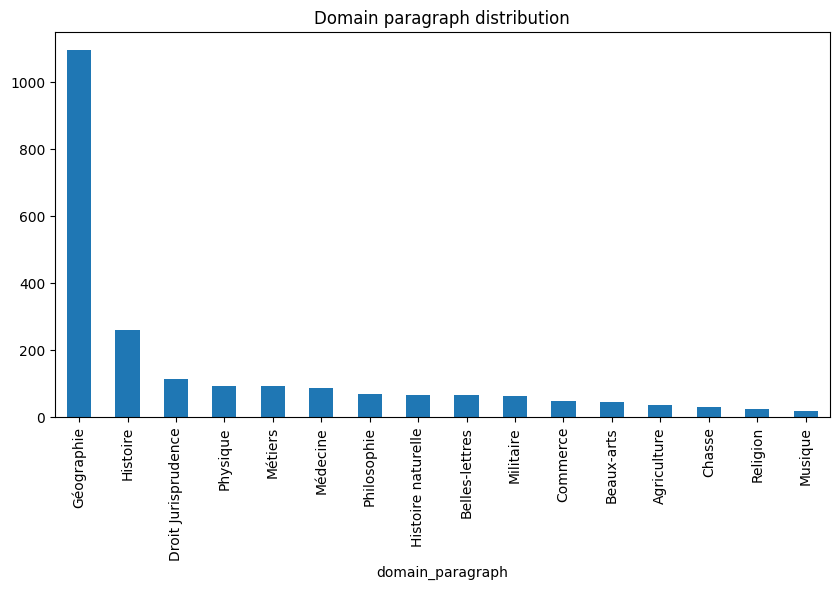

In [8]:
df['domain_paragraph'].value_counts().plot(kind='bar', figsize=(10, 5), title='Domain paragraph distribution')

### Distribution of paragraph across volumes

In [9]:
df['volume'].value_counts().sort_index()

volume
1     287
2     161
3     114
4      96
5      94
6      45
7     113
8     122
9     144
10    120
11    119
12     96
13     94
14    240
15    120
16    123
17    112
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of parapgraphs across volumes'}, xlabel='volume'>

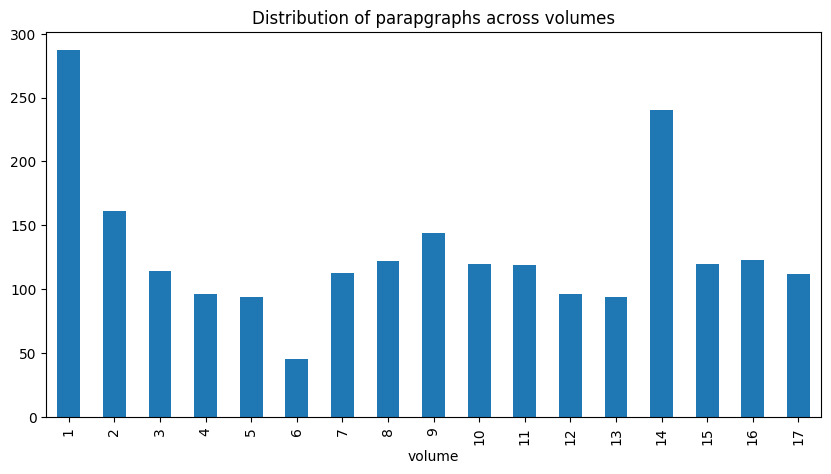

In [10]:
df['volume'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), title='Distribution of parapgraphs across volumes')

### Distribution of paragraphs across authors

In [11]:
df['author'].value_counts()

author
Jaucourt                       879
unsigned                       626
Diderot                        303
Boucher d'Argis                104
d'Alembert                      44
                              ... 
Mallet5                          1
Le Blond5                        1
d'Alembert & de La Chapelle      1
Toussaint5                       1
Alut, fils                       1
Name: count, Length: 86, dtype: int64

<Axes: title={'center': 'Distribution of parapgraphs across authors'}, xlabel='author'>

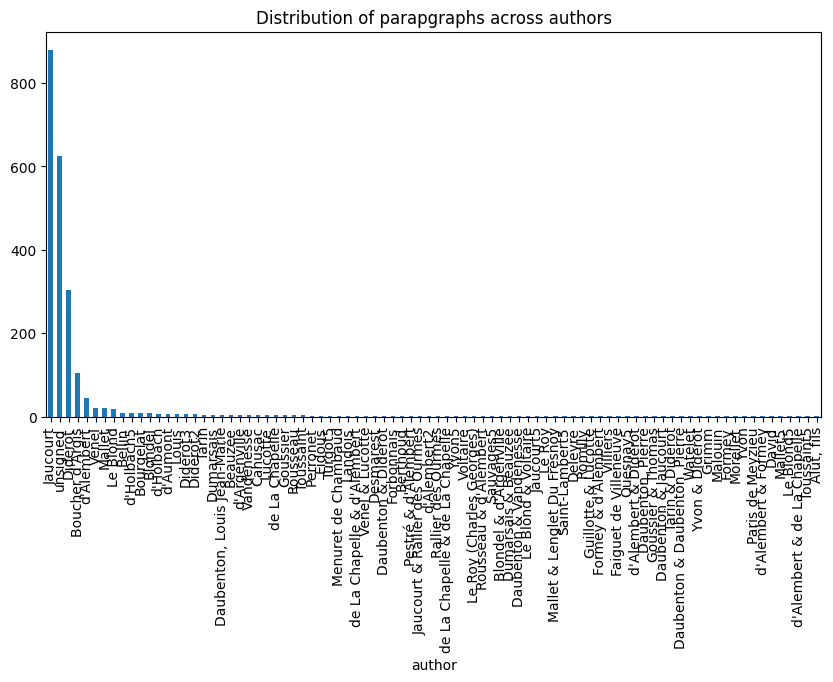

In [12]:
df['author'].value_counts().plot(kind='bar', figsize=(10, 5), title='Distribution of parapgraphs across authors')

### Number of tokens per dataset

In [13]:
def get_nb_tokens(path):
    d = 0
    with jsonlines.open(path) as reader:
        for obj in reader:
            d += len(obj['tokens'])
    return d

In [14]:
print('Number of tokens per dataset:')
for key, dataset_path in datasets_paths.items():
    print(key,'\t', get_nb_tokens(dataset_path))


Number of tokens per dataset:
train 	 132398
validation 	 14959
test 	 13881


### Number of spans per dataset

In [15]:
def get_number_spans(data):
    d = {}
    for obj in data:
        for span in obj['spans']:
                k = span['label']
                if k not in d:
                    d[k] = 1
                else:
                    d[k] += 1
    return d

def get_number_spans_from_jsonl(path):
    with jsonlines.open(path) as reader:
        return get_number_spans(reader)

In [16]:
print('Number of spans per dataset:')
for key, dataset_path in datasets_paths.items():
    print(key,'\t', get_number_spans_from_jsonl(dataset_path))

Number of spans per dataset:
train 	 {'Head': 1261, 'Domain-mark': 1069, 'NC-Spatial': 3252, 'ENE-Spatial': 3033, 'NP-Spatial': 4707, 'Relation': 2093, 'NC-Person': 1378, 'ENE-Person': 492, 'NP-Person': 1599, 'NP-Misc': 948, 'Latlong': 553, 'ENE-Misc': 255}
validation 	 {'Head': 142, 'Domain-mark': 122, 'NC-Spatial': 358, 'ENE-Spatial': 326, 'NP-Spatial': 464, 'Relation': 219, 'Latlong': 66, 'NP-Person': 170, 'NC-Person': 132, 'ENE-Person': 49, 'NP-Misc': 108, 'ENE-Misc': 31}
test 	 {'Head': 153, 'Domain-mark': 133, 'NC-Spatial': 355, 'ENE-Spatial': 334, 'NP-Spatial': 519, 'Relation': 226, 'Latlong': 72, 'NC-Person': 133, 'NP-Person': 150, 'NP-Misc': 96, 'ENE-Person': 57, 'ENE-Misc': 22}


### Spans distribution across labels

#### Concat the datasets into a compliant jsonl format

In [17]:
df_dict = df.to_dict(orient='records')

In [18]:
def plot_pie_chart_spans(spans, ordered_list=None):
    if ordered_list is not None:
        sorted_data = {tag: spans[tag] for tag in ordered_list if tag in spans}
    else:
        sorted_data = spans
    plt.rcParams['font.size'] = 12
    plt.figure(figsize=(8, 8))
    plt.pie(list(sorted_data.values()), colors = sns.color_palette("Paired"), labels=list(sorted_data.keys()), autopct='%1.1f%%', startangle=90)

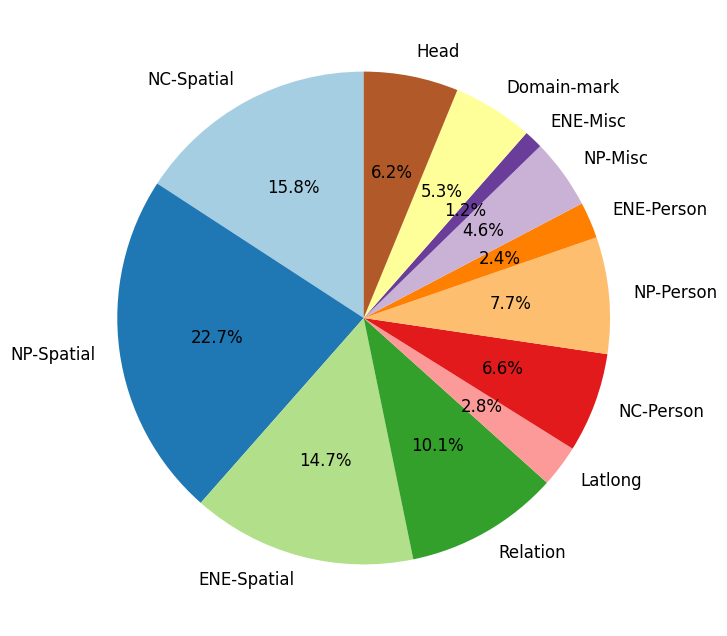

In [19]:
spans = get_number_spans(df_dict)
ordered_list = ['NC-Spatial', 'NP-Spatial', 'ENE-Spatial', 'Relation','Latlong', 'NC-Person', 'NP-Person','ENE-Person', 'NP-Misc', 'ENE-Misc', 'Domain-mark', 'Head']
plot_pie_chart_spans(spans, ordered_list)

### Spans distribution across labels (paragraphs classified under Géographie)

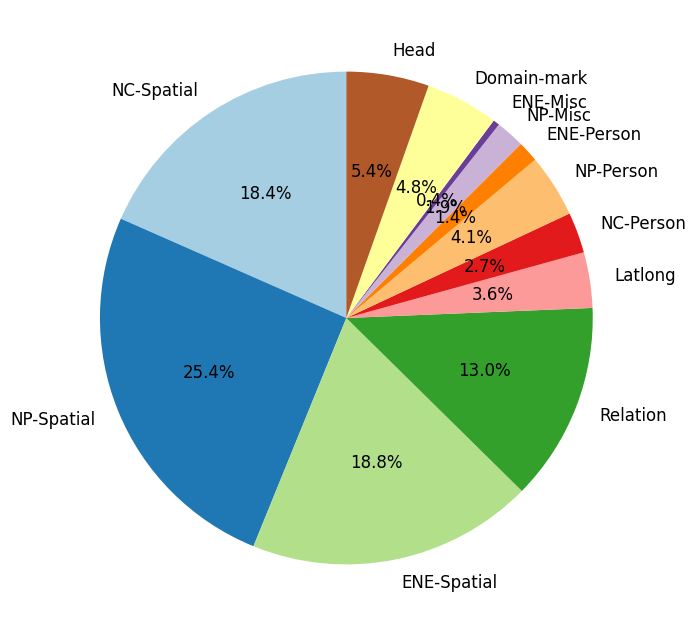

In [20]:
spans = get_number_spans(df[df['domain_paragraph'] == 'Géographie'].to_dict(orient='records'))

ordered_list = ['NC-Spatial', 'NP-Spatial', 'ENE-Spatial', 'Relation','Latlong', 'NC-Person', 'NP-Person','ENE-Person', 'NP-Misc', 'ENE-Misc', 'Domain-mark', 'Head']
plot_pie_chart_spans(spans, ordered_list)

### Spans distribution across labels (paragraphs not classified under Géographie)

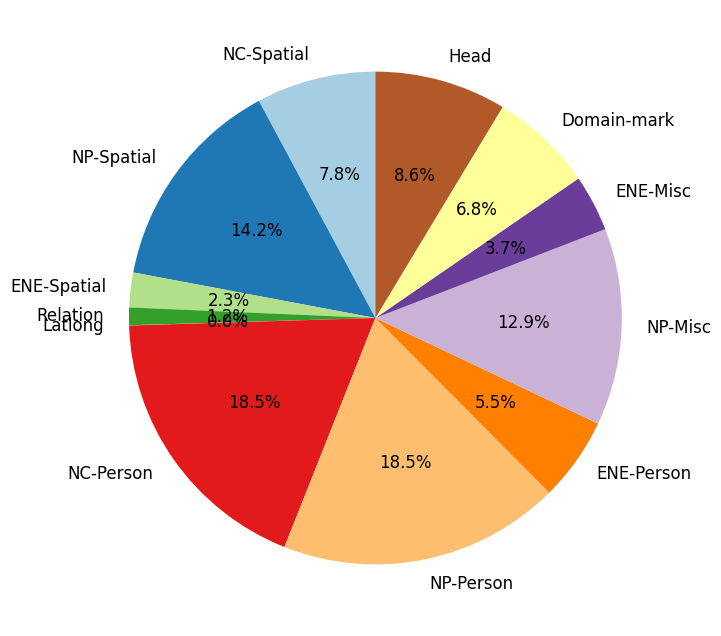

In [21]:
spans = get_number_spans(df[df['domain_paragraph'] != 'Géographie'].to_dict(orient='records'))

ordered_list = ['NC-Spatial', 'NP-Spatial', 'ENE-Spatial', 'Relation','Latlong', 'NC-Person', 'NP-Person','ENE-Person', 'NP-Misc', 'ENE-Misc', 'Domain-mark', 'Head']
plot_pie_chart_spans(spans, ordered_list)

In [22]:
def get_spans_by_freq(json_input_path, span_label):
    d = []
    with jsonlines.open(json_input_path) as reader:
        for _, obj in enumerate(reader):
            l_tokens = [t['text'] for t in obj['tokens']]
            for span in obj['spans']:
                if span['label'] == span_label:
                    d.append(' '.join(l_tokens[span['token_start']:span['token_end']+1]))
    return dict(sorted({key: d.count(key) for key in set(d)}.items(), key=lambda item: item[1], reverse=True))


In [23]:
get_spans_by_freq(train_path, 'NC-Spatial')

{'ville': 331,
 'petite ville': 182,
 'la riviere': 99,
 'la mer': 99,
 'royaume': 86,
 'la province': 73,
 'capitale': 65,
 'la ville': 61,
 "l' île": 59,
 'cette ville': 50,
 'pays': 45,
 'la côte': 42,
 'riviere': 37,
 'comté': 36,
 'villes': 34,
 'la capitale': 28,
 'duché': 28,
 'Royaume': 23,
 'île': 23,
 'fleuve': 23,
 "l' empire": 21,
 'le royaume': 20,
 'la terre': 20,
 'le golfe': 19,
 'bourg': 19,
 'un évêché suffragant': 17,
 'le comté': 17,
 'Cette ville': 17,
 'port': 16,
 'ancienne ville': 16,
 'montagne': 15,
 'cette île': 15,
 'un château': 15,
 'le pays': 15,
 'le cercle': 15,
 'province': 15,
 "l' embouchure": 14,
 'îles': 13,
 'contrée': 13,
 'diocèse': 13,
 'les frontieres': 13,
 'une plaine': 13,
 'la résidence': 12,
 'château': 12,
 'cercle': 12,
 'grande ville': 12,
 'les confins': 11,
 'lac': 11,
 'village': 10,
 'une montagne': 10,
 'les côtes': 10,
 'montagnes': 10,
 'la montagne': 10,
 'ville maritime': 9,
 'le mont': 9,
 'le lieu': 9,
 'les terres': 9,
 'ca

In [24]:
get_spans_by_freq(train_path, 'NP-Spatial')

{'France': 135,
 'Allemagne': 73,
 'Italie': 72,
 'Afrique': 51,
 'Espagne': 51,
 'Paris': 36,
 'Asie': 36,
 'Angleterre': 34,
 'Naples': 34,
 'Rome': 28,
 'Russie': 23,
 "l' Amérique méridionale": 21,
 'la Chine': 21,
 'Portugal': 20,
 'Perse': 20,
 "l' Amérique septentrionale": 19,
 'la Russie': 18,
 'Londres': 18,
 'Indes': 16,
 'Sicile': 16,
 'Venise': 13,
 'Guinée': 13,
 'Japon': 13,
 "l' Amérique": 13,
 'Rhin': 12,
 "l' Europe": 12,
 'Constantinople': 12,
 'Suede': 11,
 'Pologne': 11,
 'Pérou': 11,
 'Hollande': 10,
 'Westphalie': 10,
 "l' Océan": 10,
 'Sicyone': 9,
 'Baltique': 9,
 'Jérusalem': 9,
 'Europe': 8,
 'Franconie': 8,
 "l' Archipel": 8,
 "d' Allemagne": 8,
 'Lorraine': 8,
 'Egypte': 8,
 'Lisbonne': 8,
 "l' Estramadure": 8,
 'Normandie': 8,
 'Mexique': 8,
 "l' Afrique": 8,
 'Salamine': 8,
 'la Pologne': 8,
 "l' Arabie": 7,
 'Maroc': 7,
 'la Meuse': 7,
 'Bourgogne': 7,
 'Bretagne': 7,
 'la Vistule': 7,
 'la Méditerranée': 7,
 'le Rhin': 7,
 'Fez': 7,
 'Tunis': 7,
 'la nou

In [25]:
get_spans_by_freq(train_path, 'ENE-Spatial')

{'petite ville de France': 44,
 'ville de France': 35,
 "petite ville d' Allemagne": 31,
 "petite ville d' Italie": 23,
 "ville d' Italie": 21,
 "ville d' Allemagne": 19,
 'royaume de Naples': 19,
 "ville d' Afrique": 14,
 "ville d' Espagne": 14,
 "ville d' Asie": 13,
 'ville de Perse': 12,
 "petite ville d' Espagne": 11,
 "ville d' Angleterre": 10,
 'la mer Baltique': 9,
 "ville de l' Amérique méridionale": 8,
 'ville de Pologne': 7,
 'ville de la Chine': 7,
 'la mer du Sud': 7,
 'bourg de France': 7,
 'la nouvelle Espagne': 7,
 "l' empire russien": 6,
 'ville de Portugal': 6,
 'Royaume de Naples': 5,
 'riviere de France': 5,
 'la mer des Indes': 5,
 'la côte de Coromandel': 4,
 "riviere d' Allemagne": 4,
 "riviere d' Afrique": 4,
 'la mer Adriatique': 4,
 "ville de l' Amérique septentrionale": 4,
 'royaume de Tunis': 4,
 'ville des Indes': 4,
 'la vieille Castille': 4,
 'le cercle de Westphalie': 4,
 'la mer Méditerranée': 4,
 "l' empire de Russie": 4,
 'ville de Sicile': 4,
 'la mer

In [26]:
get_spans_by_freq(train_path, 'Relation')

{'dans': 543,
 'sur': 321,
 'au': 128,
 'en': 120,
 'entre': 73,
 'près de': 31,
 'se jette dans': 20,
 'proche': 17,
 'par': 15,
 'près du': 12,
 'vers': 12,
 "jusqu' à": 10,
 "à l' orient": 9,
 'au confluent de': 8,
 'depuis': 7,
 'à une lieue de': 7,
 'aux confins de': 7,
 'au midi de': 6,
 'proche de': 6,
 'à': 6,
 'au midi par': 5,
 'au voisinage de': 5,
 'vis-à-vis': 5,
 "à l' embouchure de": 5,
 'à six lieues de': 5,
 'au nord de': 5,
 'au midi': 5,
 'auprès de': 5,
 'près': 5,
 'à 15 lieues de': 4,
 'à 3 lieues de': 4,
 'au pié de': 4,
 'à trois lieues de': 4,
 'au bord de': 4,
 'à 4 lieues de': 4,
 "au fond d'": 4,
 'à 2 lieues de': 4,
 'aux': 4,
 'au couchant': 4,
 'à deux lieues de': 4,
 'près des': 4,
 'vis-à-vis de': 4,
 'avec': 4,
 'traverse': 4,
 'sur le bord du': 4,
 'prend sa source dans': 4,
 'prend sa source': 4,
 'a sa source dans': 3,
 'bornée au nord par': 3,
 "à l' occident": 3,
 'se jetter dans': 3,
 'à 7 lieues de': 3,
 'au sud par': 3,
 'se jette un peu au - d

In [27]:
get_spans_by_freq(train_path, 'NC-Person')

{'M.': 75,
 'roi': 47,
 'S.': 24,
 'peuples': 23,
 "l' empereur": 18,
 'son fils': 14,
 'prince': 13,
 'les habitans': 13,
 'peuple': 12,
 'le roi': 12,
 'le P.': 11,
 'fils': 11,
 'habitans': 10,
 'pape': 10,
 'les maîtres': 9,
 'ouvriers': 9,
 "l' évêque": 8,
 'le peuple': 8,
 'ce prince': 8,
 "l' abbé": 8,
 'la reine': 7,
 'son pere': 7,
 'le prince': 7,
 'Le P.': 7,
 'Les habitans': 6,
 'les femmes': 6,
 'seigneur': 6,
 'Le roi': 5,
 'les citoyens': 5,
 'juges': 5,
 'le cardinal': 5,
 'Roi': 5,
 'le géographe': 5,
 'les ouvriers': 5,
 'président': 5,
 'les peuples': 5,
 'ses enfans': 5,
 'maître': 5,
 'le pape': 5,
 'anciens': 5,
 'gouverneur': 4,
 'le Roi': 4,
 'le czar': 4,
 'comte': 4,
 'le poëte': 4,
 'hommes': 4,
 'le chevalier': 4,
 'sa mere': 4,
 'les soldats': 4,
 'esclaves': 4,
 'cardinal': 4,
 'ancien peuple': 4,
 'maîtres': 4,
 'philosophe': 4,
 'le duc': 4,
 'femme': 4,
 'patriarche': 4,
 'les anciens': 4,
 'une femme': 4,
 'un homme': 4,
 'seigneurs': 3,
 'les souverai

In [28]:
get_spans_by_freq(train_path, 'NP-Person')

{'Ptolomée': 33,
 'Pline': 33,
 'Strabon': 23,
 'Euripide': 16,
 'les Romains': 14,
 'Pierre': 13,
 'Turcs': 12,
 'Romains': 12,
 'les Anglois': 12,
 'Dieu': 11,
 'César': 10,
 'les Espagnols': 9,
 'Cicéron': 9,
 'Aristote': 9,
 'Antonin': 9,
 'François': 8,
 'les Hollandois': 8,
 'Louis XIV': 8,
 'les Latins': 8,
 'Pausanias': 8,
 'Les Hollandois': 8,
 'Métrodore': 7,
 'Tournefort': 7,
 'les Juifs': 7,
 'Negres': 7,
 'Tite - Live': 7,
 'Etienne': 7,
 'Auguste': 7,
 'Diodore': 7,
 'Jesus - Christ': 6,
 'Les Anglois': 6,
 'Jacques': 6,
 'Jupiter': 6,
 'Lisle': 6,
 'Plutarque': 6,
 'les François': 6,
 'Pierre le grand': 5,
 'Hollandois': 5,
 'Hardouin': 5,
 'Jagas': 5,
 'Juda': 5,
 'les Portugais': 5,
 'Henri IV': 5,
 'Hippocrate': 5,
 'Hercule': 5,
 'les Grecs': 5,
 'Justin': 5,
 'les Russes': 5,
 'les Maures': 5,
 'Jaucourt': 5,
 'Juifs': 4,
 'Espagnols': 4,
 'Anglois': 4,
 'Dagobert': 4,
 'Galien': 4,
 'Tavernier': 4,
 'Teucer': 4,
 'Volodimer': 4,
 'Vitruve': 4,
 'Constantin': 4,
 'E

In [29]:
get_spans_by_freq(train_path, 'ENE-Person')

{'M. de Lisle': 6,
 'M. de Voltaire': 4,
 'M. le Chevalier de Jaucourt': 3,
 'le czar Pierre': 3,
 'Le chevalier de Jaucourt': 3,
 'roi de Prusse': 3,
 'M. Petit de la Croix': 3,
 'roi de France': 3,
 'Diodore de Sicile': 3,
 'Etienne le géographe': 3,
 'le P. Gaubil': 3,
 'roi de Macédoine': 2,
 'la reine Elisabeth': 2,
 "prince de l' Empire": 2,
 'M. Simon': 2,
 'Le P. Hardouin': 2,
 'prince de Condé': 2,
 "l' électeur de Saxe": 2,
 'S. Barnabé': 2,
 'le poëte de Salamine': 2,
 'le P. Daniel': 2,
 "roi d' Austrasie": 2,
 'S. Benoît': 2,
 'roi Jacques': 2,
 'le cardinal de Richelieu': 2,
 'M. Model': 2,
 'S. Jacques': 2,
 'souverain de Russie': 2,
 'P. Niceron': 1,
 "les beaux génies d' Angleterre": 1,
 'M. Shuckford': 1,
 'des citoyens romains': 1,
 'Le soldat russe': 1,
 'le poëte Sarrazin': 1,
 'saint Mélece': 1,
 'roi des Hérules': 1,
 'S. Polieucte': 1,
 'les scholiastes de Pindare': 1,
 'le P. Sirmond': 1,
 'M. Vesseling': 1,
 'le médecin grec': 1,
 "peuples sauvages de l' Améri

In [30]:
get_spans_by_freq(train_path, 'NP-Misc')

{"l' Eglise": 10,
 'grec': 7,
 '1707': 6,
 'russien': 6,
 'Glaciale': 4,
 'romain': 4,
 'Noire': 4,
 'la Croix': 4,
 '1676': 3,
 'Rhétorique': 3,
 '1663': 3,
 'La Statique': 3,
 'rouge': 3,
 'Chambers': 3,
 '1744': 3,
 'Jupiter': 3,
 'romaine': 3,
 'Trévoux': 3,
 '1703': 3,
 'Parlement': 3,
 'Rouge': 3,
 'Sud': 3,
 '1693': 3,
 'Plante': 3,
 'Mercure': 3,
 '1588': 3,
 'Théodosien': 3,
 '1708': 3,
 'grecque': 3,
 'Hydrodynamique': 3,
 'la Physique': 3,
 'Russien': 3,
 "l' Histoire naturelle": 3,
 '1614': 3,
 '1681': 3,
 '1554': 2,
 '1533': 2,
 'Immortelle': 2,
 'Précipitation': 2,
 'Est': 2,
 '1682': 2,
 'Mai': 2,
 '1715': 2,
 '1536': 2,
 '1572': 2,
 '1570': 2,
 'Musique': 2,
 '1586': 2,
 '1590': 2,
 'le xij . siecle': 2,
 'le x. siecle': 2,
 'russes': 2,
 '1623': 2,
 'or': 2,
 'Dict . du Comm': 2,
 '1638': 2,
 'Médecine': 2,
 'le Christianisme': 2,
 'Philosophie': 2,
 "l' Hydrodynamique": 2,
 '1658': 2,
 'Méchanique': 2,
 'Résistance': 2,
 '1260': 2,
 'la soixante-quinzieme olympiade': 

In [31]:
get_spans_by_freq(train_path, 'ENE-Misc')

{"l' empire romain": 4,
 "la Logique d' Aristote": 3,
 "L' itinéraire d' Antonin": 2,
 "blanc d' Espagne": 2,
 "l' itinéraire d' Antonin": 2,
 "graine d' Avignon": 2,
 'la ruine de Jérusalem': 2,
 'la cour du Dairi': 2,
 'le traité des Pyrénées': 1,
 'les articl . Charger & Salpetre': 1,
 "mois d' Avril": 1,
 'mois de Mai': 1,
 'college de Gresham': 1,
 "riches commanderies de l' ordre de S. Jacques": 1,
 'la seigneurie de Weissemberg': 1,
 'le regne de Jean II': 1,
 'les ouvrages des Espagnols': 1,
 'les églises russes': 1,
 'la déclaration du 21 Mars 1671': 1,
 "l' article Conseil des Dépêches": 1,
 'arrêt de 1260': 1,
 "l' ordre Teutonique": 1,
 'les médailles romaines': 1,
 'achat des Negres': 1,
 'livre de Job': 1,
 "l' ordonnance de saint Louis": 1,
 "relation d' Afrique": 1,
 'histoire des Goths': 1,
 'Les anciennes lois des Francs': 1,
 "l' ambassade holstenoise": 1,
 'la maison de David': 1,
 "l' ordre de S. Jacques": 1,
 "grandes maisons d' Espagne": 1,
 "l' epée des Romains"

In [32]:
get_spans_by_freq(train_path, 'Domain-mark')

{'Géog .': 325,
 'Géog . mod .': 233,
 'Géog . anc .': 54,
 'Géogr .': 42,
 'Géogr . mod .': 19,
 'Marine .': 14,
 'Hist . nat .': 13,
 'Gram .': 11,
 'Géogr . anc .': 10,
 'Jurisprud .': 10,
 'Géog . anc . & mod .': 8,
 'Gramm .': 7,
 'Jurispr .': 6,
 'Geog .': 6,
 'Hist . mod .': 5,
 'Géographie .': 5,
 'Commerce .': 5,
 'Hist . anc .': 4,
 'Hist . nat . Zoolog .': 4,
 'en Anatomie': 4,
 'Comm .': 4,
 'Géog': 4,
 'Géog . mod': 4,
 'Théol .': 3,
 'Maréchallerie .': 3,
 'Danse .': 3,
 'Physiq .': 3,
 'Med .': 3,
 'Geog . mod .': 3,
 'Chimie .': 3,
 'Littérat .': 3,
 'terme de Blason': 3,
 'Archit .': 3,
 'Geog . anc .': 3,
 'Jardinage .': 3,
 'Coupe des pierres .': 2,
 'Géograph .': 2,
 "dans l' Artillerie": 2,
 'Jurisp .': 2,
 'Myth .': 2,
 'Art méchaniq .': 2,
 'terme de Riviere': 2,
 'Chronolog .': 2,
 'Hist . nat . bot .': 2,
 'Commerce': 2,
 'Manufact . en soie .': 2,
 'Géog . anc': 2,
 'Manége , Maréchall .': 2,
 'Verrerie .': 2,
 'Géogr': 2,
 'Géograph . mod .': 2,
 'terme de ri